## 개요 
* KOSIS 지역별 / 상품군별 온라인쇼핑 해외직접판매액 데이터를 활용한 간단한 분석<br>
[KOSIS 상품군별 온라인쇼핑 해외직접판매액](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE)

* 실습 기록용으로 남깁니다.

## 분석

### 데이터 불러오기

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import koreanize_matplotlib
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('online_export.csv')#, encoding="cp949")

In [10]:
df.head()

,Unnamed: 0,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033


### 시점 데이터의 분류 (연도, 분기의 구분), 단위표기

In [11]:
df['연도'] = df['시점'].map(lambda x : x.split('.')[0])
df['분기'] = df['시점'].map(lambda x : x.split('.')[1].split('/')[0])
df[['연도','분기']] = df[['연도','분기']].astype(int)

df = df.rename(columns={'데이터':'백만'})
df

,Unnamed: 0,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
0,0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1
...,...,...,...,...,...,...,...,...
2767,2767,기타,기 타,면세점 이외,2021.2/4,1278,2021,2
2768,2768,기타,기 타,면세점 이외,2021.3/4,1154,2021,3
2769,2769,기타,기 타,면세점 이외,2021.4/4,1076,2021,4
2770,2770,기타,기 타,면세점 이외,2022.1/4,2325,2022,1


### 데이터 자체에 대한 분석 (describe)

In [12]:
df.describe()

,Unnamed: 0,백만,연도,분기
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,1385.500000,1613.116522,2019.272727,2.409091
std,800.351798,4273.426107,1.600909,1.114533
min,0.000000,-10003.000000,2017.000000,1.000000
25%,692.750000,41.750000,2018.000000,1.000000
50%,1385.500000,291.500000,2019.000000,2.000000
75%,2078.250000,1181.000000,2021.000000,3.000000
max,2771.000000,47689.000000,2022.000000,4.000000


* 특이하게도 최소값에 음수(-10003)이 있음
  * 해외역직구와 같은 경향인가 추측해보았지만, 전체 국가/연도에서 단 1개값만 그렇다고 보기는 어려움
  * 이상치로 보여 제거하고 분석을 진행하면 어떨까 싶음

### 국가별 판매액에 대한 heatmap을 통한 파악

<Axes: xlabel='연도', ylabel='국가(대륙)별'>

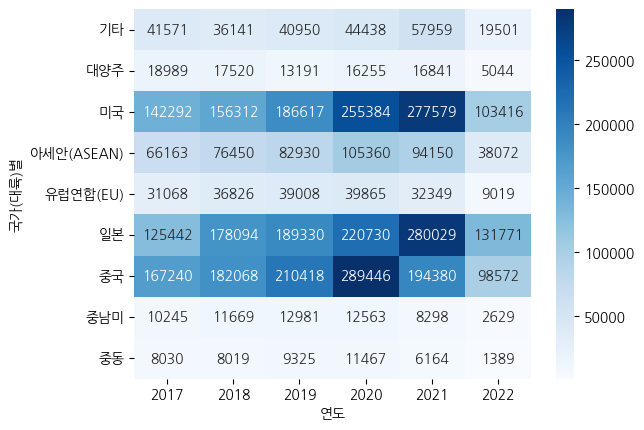

In [13]:
sales_country = df.pivot_table(values='백만', index='국가(대륙)별', columns='연도', aggfunc='sum')
sns.heatmap(data=sales_country, annot=True, fmt='.0f', cmap='Blues')

* 미국, 일본, 중국의 판매액이 두드러짐

### 판매액 상위 3개국에 대한 판매액 추세 시각화

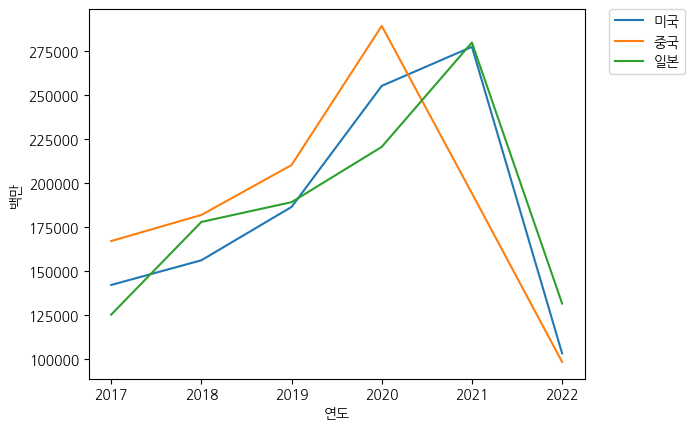

In [14]:
sns.lineplot(data=df[df['국가(대륙)별'].isin(['미국','중국','일본'])], 
             x='연도',y='백만',hue='국가(대륙)별', errorbar=None, estimator='sum'
            )
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0) #bbox_to_anchor(그래프와의 관격, 위/아래 위치)

* 2020, 2021년도 급격한 하락이 보임
  * 당시의 큰 이벤트로는 코로나가 있으며, 해당 시기의 국가봉쇄/여객기 항편취소/화물기 감편 등이 원인일 것으로 보임

### 2020년 국가별 주요 상품군 분석

* 판매액 비중이 높은 주요 국가에 대해 분석 진행

<Axes: xlabel='분기', ylabel='국가(대륙)별'>

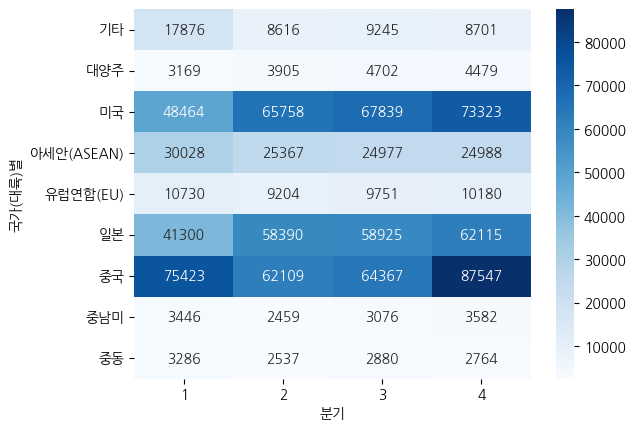

In [15]:
df_2020 = df[df['연도']==2020].groupby(['국가(대륙)별','분기'])['백만'].sum().unstack().copy()
sns.heatmap(data=df_2020, annot=True, fmt='.0f', cmap='Blues')

* 주요 3개국(미국, 일본, 중국)에 대한 제품군별 판매액 분석

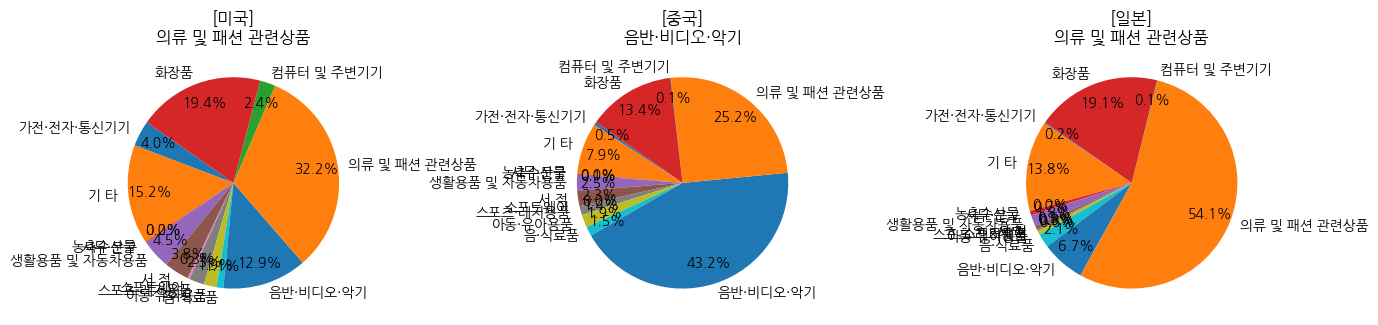

In [16]:
filter_rule = (df['연도']==2020) & (df['국가(대륙)별'].isin(['미국','중국','일본']))
df_2020_top3 = df[filter_rule][['국가(대륙)별','상품군별','백만']]

# 잘 팔리는 상품군을 딕셔너리에 저장
best_category = {}
best2_category = {}
for i, country in enumerate(df_2020_top3['국가(대륙)별'].unique()):
    filter_country = df_2020_top3['국가(대륙)별'] == country
    globals()[country] = df_2020_top3[filter_country].groupby(['상품군별'])['백만'].sum().copy()
    best_category[i] = globals()[country].sort_values(ascending=False).index[0]
    best2_category[i]= globals()[country].sort_values(ascending=False).index[1]

#그래프 기본 틀
fig, axs = plt.subplots(ncols=3, figsize=(15,8), # ncols(그래프 수), figsize(공간크기)
                       gridspec_kw={'wspace':0.7},) #gridspec으로 그래프 사이 여백 설정

#그래프 그리기 (반복문으로 그래프를 그리고, 범례설정과 국가/1위카테고리를 입력한 제목 생성)
sub_title=[]
for i, country  in enumerate(df_2020_top3['국가(대륙)별'].unique()):
    globals()[country].plot(kind='pie',startangle=145, autopct='%.1f%%', ax=axs[i], pctdistance=0.8, #rotatelabels=True,
                           )
    sub_title.append("["+country+"]")  
    axs[i].set_title(sub_title[i]+ chr(10) +best_category[i])
    axs[i].set_ylabel('')
    axs[i].labels=None

* 국가별 판매액 상위
    * 미국 : 의류 및 패션관련상품
    * 중국 : 음반 비디오 악기
    * 일본 : 의류 및 패션관련 상품

* 4분기 판매가 두드러지는데, 특별히 비중이 많은 상품이 있는지 확인

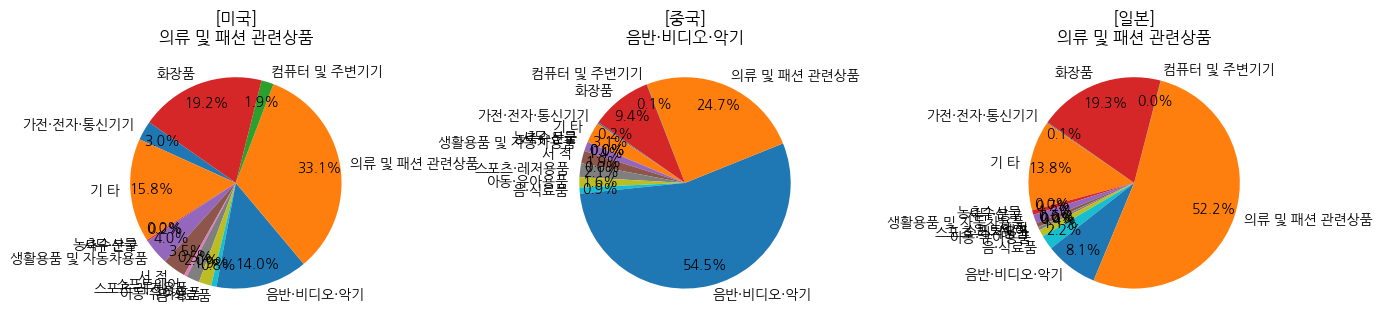

In [17]:
filter_rule = (df['연도']==2020) & (df['국가(대륙)별'].isin(['미국','중국','일본'])) & (df['분기']==4)
df_2020_top3_quarter4 = df[filter_rule][['국가(대륙)별','상품군별','백만']]

# 잘 팔리는 상품군을 딕셔너리에 저장
best_category = {}
best2_category = {}
for i, country in enumerate(df_2020_top3_quarter4['국가(대륙)별'].unique()):
    filter_country = df_2020_top3_quarter4['국가(대륙)별'] == country
    globals()[country] = df_2020_top3_quarter4[filter_country].groupby(['상품군별'])['백만'].sum().copy()
    best_category[i] = globals()[country].sort_values(ascending=False).index[0]
    best2_category[i]= globals()[country].sort_values(ascending=False).index[1]

#그래프 기본 틀
fig, axs = plt.subplots(ncols=3, figsize=(15,8), # ncols(그래프 수), figsize(공간크기)
                       gridspec_kw={'wspace':0.7},) #gridspec으로 그래프 사이 여백 설정

#그래프 그리기 (반복문으로 그래프를 그리고, 범례설정과 국가/1위카테고리를 입력한 제목 생성)
sub_title=[]
for i, country  in enumerate(df_2020_top3_quarter4['국가(대륙)별'].unique()):
    globals()[country].plot(kind='pie',startangle=145, autopct='%.1f%%', ax=axs[i], pctdistance=0.8, #rotatelabels=True,
                           )
    sub_title.append("["+country+"]")  
    axs[i].set_title(sub_title[i]+ chr(10) +best_category[i])
    axs[i].set_ylabel('')
    axs[i].labels=None

* 4분기 국가별 판매액 상위 (변동없음)
    * 미국 : 의류 및 패션관련상품
    * 중국 : 음반 비디오 악기
    * 일본 : 의류 및 패션관련 상품

* 미국, 일본은 '의류 및 패션상품' 판매가 두드러지므로 해외직구활성화 방안 등을 강구한다면 해당 업종을 눈여겨 봐야할 듯 함
* 두번째로는 '화장품' 판매실적이 좋은데, 분류가 되어있지 않으니 기초/색조 여부 등을 보긴 해야겠지만
  * 기초화장품 쪽 주력인 업체가 있다면 진출을 고민하는 등의 방향을 고민해보면 좋을 듯 하고
  * 색조화장품 쪽 주력인 업체라면 해당 국가들의 미의 기준(선호색 등)을 파악하며 시작하면 좋을 듯 함

* 중국은 '음반 비디오 악기' 판매 실적이 좋은데, 2020년이라면 한류가 원인 중 하나가 아닐까 싶음
  * 간단히 구글링을 했을 때 '한국구제문화교류진흥원'이란 곳의 보고서에 따르면 아래와 같은 상태 부분이 있음
    * 20년 1월~7월의 한국 3대 엔터테인먼트들의 주가는 상승했고, 원인 중 하나가 글로벌 팬덤의 확대와 빌보드 차트 진입과 중국 현지화 전략의 순항이라 함
      (물론 위에서 말한 원인은 구체적 자료를 제시한 내용은 아님)
    * 중국판 미생의 방영 등 한류 자체는 긍정적인 상황으로 보임(물론 중국판 미생이 `18년 제작을 마쳤으니 위의 수치엔 영향 없을듯 함)

* 중국의 한류에 대한 내용검색을 위한 보고서였지만, 제조업(화장품)관련 보고서 내용도 있었는데,
  * 화장품수출 강세는 색조화장품 뿐 아니라 기초화장품도 늘었다는 내용으로 보아 두 품목 모두 상승을 견인한 것으로 보임
  * 의류 강세관련하여, '팬데믹으로 의류산업은 고전'중이지만 '마스크, 방호복 등 관련 수요 증가'라는 내용이 있어 의류품목 관련 판단은 좀 더 해보아야겠음

* 참고한 자료 : https://kofice.or.kr/b20industry/b20_industry_00_view.asp?seq=1134&tblID=gongji&clsID=0

### 판매액 상위국가에 대한 주요 상품 시각화

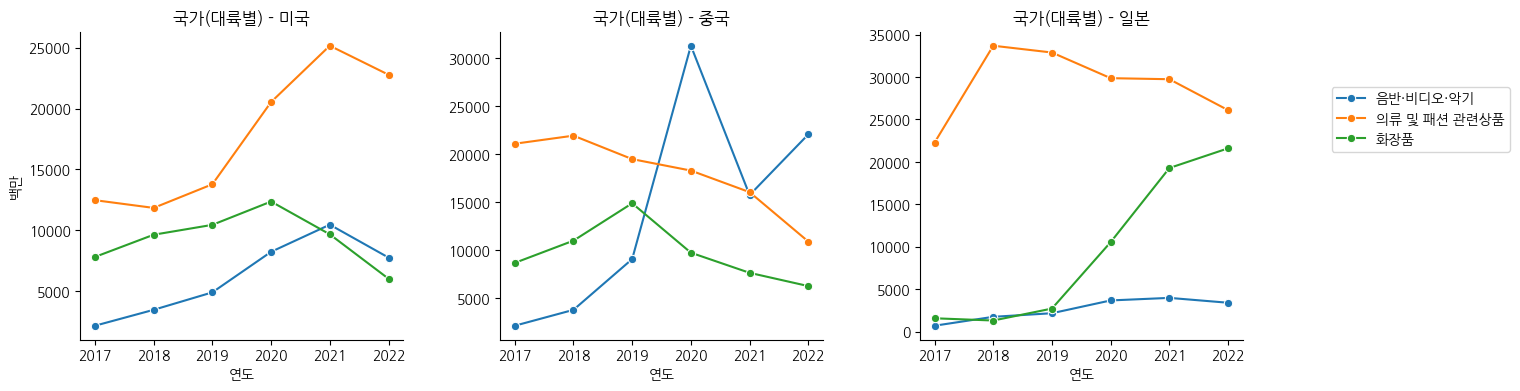

In [19]:
filter_rule2 = (df['국가(대륙)별'].isin(['미국','일본','중국']))&(df['상품군별'].isin(["의류 및 패션 관련상품", "화장품", "음반·비디오·악기"]))
df_top3_categorical = df[filter_rule2].copy()

fig, axs = plt.subplots(ncols=3, figsize=(15,4), # ncols(그래프 수), figsize(공간크기)
                       gridspec_kw={'wspace':0.3},) #gridspec으로 그래프 사이 여백 설정

ylabel_text = {0:'백만',1:'',2:''}
for i, country  in enumerate(df_top3_categorical['국가(대륙)별'].unique()):
    sns.lineplot(data=df_top3_categorical[df_top3_categorical['국가(대륙)별'] == country], 
                 x='연도', y='백만', hue='상품군별', errorbar=None, marker='o',
                 ax = axs[i])
    axs[i].set_title('국가(대륙별) - ' + country)
    axs[i].spines[['top','right']].set_visible(False) # 그래프 테두리 왼쪽,위,오른쪽 안보이게(false)
    axs[i].legend().set_visible(False)
    axs[i].set_ylabel(ylabel_text[i])
axs[2].legend(bbox_to_anchor=(2,1), loc=0, borderaxespad=4)

* 의류 분야는 세 국가 모두 `21년을 기점으로 하락세
* 화장품은 미국/중국 하락세이나 일본이 크게 성장하여, `22년의 화장품 판매액은 일본의 영향이 크지 않을까 추측
* 음반은 `21~22년도에 중국에서 판매액 증가가 뚜렷

* 실제로도 확인해보니, `22년도 판매액은 일본의 비중이 컸음(하단 그래프)

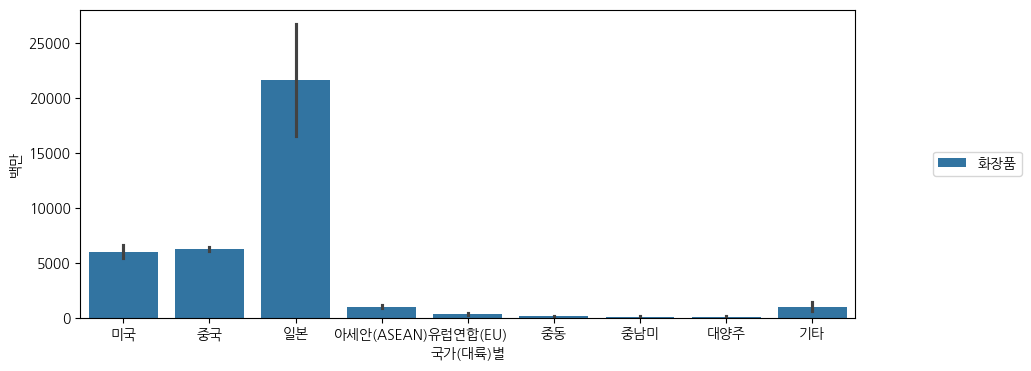

In [31]:
plt.figure(figsize=(10,4))
sns.barplot(data=df[(df['연도'] == 2022) & (df['상품군별'] == '화장품')],
             x='국가(대륙)별', y='백만', hue='상품군별', dodge=False)
plt.legend(bbox_to_anchor=(1.1,0.5), loc=6, borderaxespad=0) #bbox_to_anchor(그래프와의 관격, 위/아래 위치)
             #loc(좌우), borderaxespad(클수록 아래로)

## 추가과제
* 현재 분석과는 관계없지만, 함께 진행한 과제가 있어 기록만 해둠

In [32]:
# Choropleth 시각화

# 데이터 불러오기 & 가공(월 합계 등)
raw_data = pd.read_csv(
    '국가별_수출입현황_20221119232639.csv', 
    encoding="cp949")

iso_table = pd.read_excel('iso_alpha.xlsx', engine='openpyxl')
iso_table = iso_table[['나라 이름','alpha-3']]

raw_data_saved = raw_data.copy()
raw_data_saved['2022년합계'] = raw_data_saved[raw_data_saved.columns[2:]].sum(axis=1)

# Pivot table(국가별 합계) - 합계 0은 제외 (시각화되어있지않으면 0으로 간주, 메모리도 더 절약될 것이라 생각)
pivoted = raw_data_saved.groupby(['국가별(1)'])[['2022년합계']].sum()
pivoted = pivoted[pivoted['2022년합계']!=0]

# replace로 국가명↔코드로 변환 (영문으로 변환되지 않은 국가['키리바티', '타지크' 등 생소한 국가]는 제외했습니다)
pivoted['iso_table']=pivoted.index
pivoted['국가명']=pivoted.index
pivoted['iso_table'] = pivoted['iso_table'].replace(iso_table['나라 이름'].tolist(),iso_table['alpha-3'].tolist())

pivoted['iso_table'] = pivoted['iso_table'][((pivoted['iso_table'].str.upper()) != (pivoted['iso_table'].str.lower()))]
pivoted

,2022년합계,iso_table,국가명
국가별(1),,,
가나,146268,GHA,가나
가봉,-709661,GAB,가봉
가이아나,20358,GUY,가이아나
감비아,-1354,GMB,감비아
건지,7,NaN,건지
...,...,...,...
필리핀,6247769,PHL,필리핀
허드 앤 맥도날드 군도,-27,NaN,허드 앤 맥도날드 군도
헝가리,3696148,HUN,헝가리


In [34]:
# plotly의 choropleth를 활용
# 지도위에 마우스를 올리면 국가명/iso code / 무역수지(백만단위)를 표현
import plotly.express as px

fig = px.choropleth(pivoted, locations="iso_table",
                    color="2022년합계",
                    hover_name="국가명",
                    color_continuous_scale=px.colors.sequential.Plasma,
                   title='2022년 국가별 무역수지 현황')

fig.show()

* Quarto rendring 문제로 출력 예시 이미지 첨부
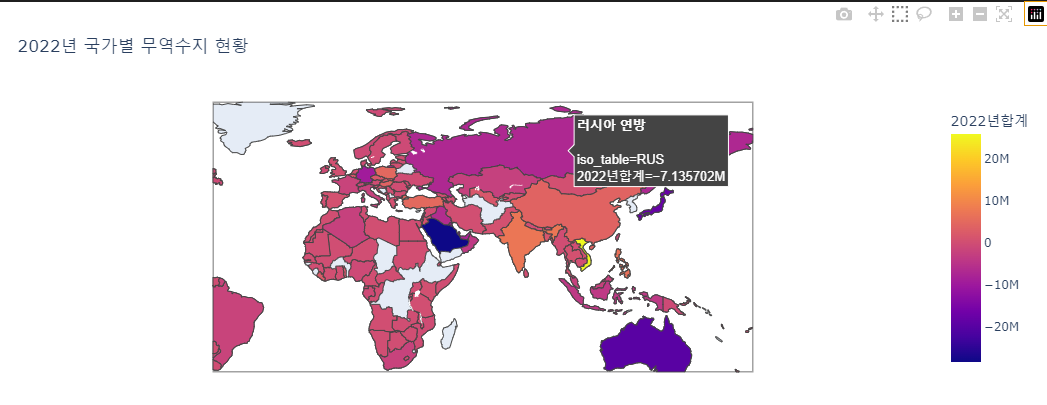